# Q3.1 Experiments with the shooting algorithm

In [7]:
from lasso_solutions import LassoRegression, do_grid_search_lasso, do_grid_search_homotopy
from release.code.setup_problem import load_problem
from release.code.ridge_regression import plot_prediction_functions, do_grid_search_ridge, RidgeRegression, compare_parameter_vectors

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Q3.1.2 
Compare Lasso solution with cyclic coordinates descent versus randomized coordinates descent;

Compare Lasso solution attained for starting from 0 versus starting from ridge regression solution (suggested by Murphy).

In [8]:
# Load dataset
lasso_data_fname = "release/code/lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = load_problem(lasso_data_fname)
X_train = featurize(x_train)
X_val = featurize(x_val)

pred_fns = []

# Target function
x = np.sort(np.concatenate([np.arange(0,1,.001), x_train]))
X = featurize(x)
name = "Target Parameter Values (i.e. Bayes Optimal)"
pred_fns.append({"name":name, "coefs":coefs_true, "preds": target_fn(x) })
coef_init = np.zeros(X.shape[1])

# Lasso with cyclic coordinates descent
l1_reg = 0.08 # optimal lambda found in grid search
lasso_regression_estimator = LassoRegression(l1_reg=l1_reg)
lasso_regression_estimator.fit(X_train, y_train, coef_init=coef_init)
name = "Lasso with cyclic coordinates descent"
pred_fns.append({"name":name,
                 "coefs":lasso_regression_estimator.w_,
                 "preds": lasso_regression_estimator.predict(X) })

# Lasso with randomized coordinates descent
lasso_regression_estimator_randomized = LassoRegression(l1_reg=l1_reg, randomized=True)
lasso_regression_estimator_randomized.fit(X_train, y_train, coef_init=coef_init)
name = "Lasso with randomized coordinates descent"
pred_fns.append({"name":name,
                 "coefs":lasso_regression_estimator_randomized.w_,
                 "preds": lasso_regression_estimator_randomized.predict(X) })

# Lasso starting at ridge regression solution
lasso_regression_estimator_murphy = LassoRegression(l1_reg=l1_reg)
lasso_regression_estimator_murphy.fit(X_train, y_train)
name = "Lasso starting at ridge regression solution"
pred_fns.append({"name":name,
                 "coefs":lasso_regression_estimator_murphy.w_,
                 "preds": lasso_regression_estimator_murphy.predict(X) })

Ran for 1000 epochs.
Ran for 1000 epochs.
Ran for 833 epochs.


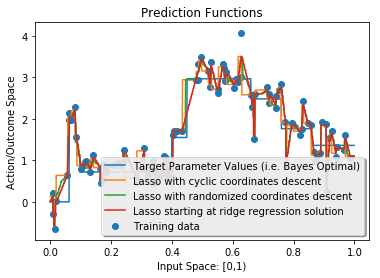

In [21]:
f = plot_prediction_functions(x, pred_fns, x_train, y_train)
plt.show()

## Q3.1.3
Parameter tuning;

Lasso and ridge solution compare.

In [3]:
grid, results = do_grid_search_lasso(X_train, y_train, X_val, y_val)

Ran for 6 epochs.
Ran for 231 epochs.
Ran for 571 epochs.
Ran for 830 epochs.
Ran for 730 epochs.
Ran for 641 epochs.
Ran for 693 epochs.
Ran for 903 epochs.
Ran for 792 epochs.
Ran for 796 epochs.
Ran for 730 epochs.
Ran for 719 epochs.
Ran for 794 epochs.
Ran for 796 epochs.
Ran for 798 epochs.
Ran for 799 epochs.
Ran for 796 epochs.
Ran for 792 epochs.
Ran for 789 epochs.
Ran for 786 epochs.
Ran for 795 epochs.
Ran for 793 epochs.
Ran for 792 epochs.


In [5]:
results

,param_l1_reg,mean_test_score,mean_train_score
0,0.0001,0.172578,0.006752
1,0.0010,0.172471,0.006752
2,0.0100,0.171410,0.006806
3,0.1000,0.162105,0.011143
7,0.2500,0.148975,0.024710
8,0.5000,0.136842,0.048919
12,0.5500,0.135228,0.053337
13,0.6000,0.133866,0.057684
14,0.6500,0.132625,0.061976
15,0.7000,0.131377,0.066474


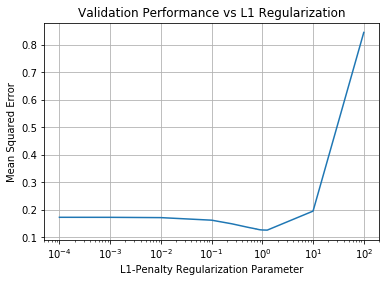

In [6]:
# Plot validation performance vs regularization parameter
fig, ax = plt.subplots()
ax.semilogx(results["param_l1_reg"], results["mean_test_score"])
ax.grid()
ax.set_title("Validation Performance vs L1 Regularization")
ax.set_xlabel("L1-Penalty Regularization Parameter")
ax.set_ylabel("Mean Squared Error")
plt.show()

Ran for 719 epochs.


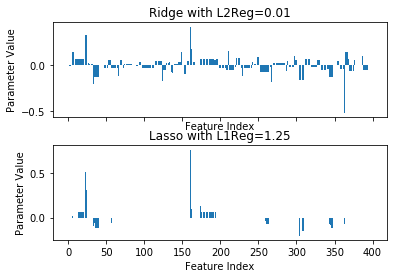

In [9]:
pred_fns_ = []

# Get optimal solution from ridge regression
ridge_grid, ridge_results = do_grid_search_ridge(X_train, y_train, X_val, y_val)
l2_reg = ridge_grid.best_params_['l2reg']
ridge_regression_estimator = RidgeRegression(l2reg=l2_reg)
ridge_regression_estimator.fit(X_train, y_train)
name = "Ridge with L2Reg="+str(l2_reg)
pred_fns_.append({"name":name,
                 "coefs":ridge_regression_estimator.w_,
                 "preds": ridge_regression_estimator.predict(X) })

# Get optimal solution from Lasso regression
l1_reg = grid.best_params_['l1_reg']
lasso_regression_estimator = LassoRegression(l1_reg=l1_reg)
lasso_regression_estimator.fit(X_train, y_train)
name = "Lasso with L1Reg="+str(l1_reg)
pred_fns_.append({"name":name,
                 "coefs":lasso_regression_estimator.w_,
                 "preds": lasso_regression_estimator.predict(X) })

# Compare parameters from Lasso regression versus ridge regression
compare_parameter_vectors(pred_fns_)

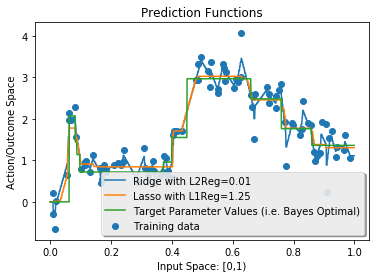

In [13]:
pred_fns_.append({"name":"Target Parameter Values (i.e. Bayes Optimal)", "coefs":coefs_true, "preds": target_fn(x) })
f = plot_prediction_functions(x, pred_fns_, x_train, y_train)
plt.show()

## Q3.1.4 
Implement homotopy method.

In [4]:
lasso_reg_path_estimator = do_grid_search_homotopy(X_train, y_train, X_val, y_val)
scores = lasso_reg_path_estimator.score(X_val, y_val)

Ran for 1 epochs.
Ran for 594 epochs.
Ran for 578 epochs.
Ran for 705 epochs.
Ran for 671 epochs.
Ran for 136 epochs.
Ran for 132 epochs.
Ran for 127 epochs.
Ran for 303 epochs.
Ran for 319 epochs.
Ran for 300 epochs.
Ran for 280 epochs.
Ran for 319 epochs.
Ran for 351 epochs.
Ran for 332 epochs.
Ran for 313 epochs.
Ran for 334 epochs.
Ran for 320 epochs.
Ran for 301 epochs.
Ran for 614 epochs.
Ran for 723 epochs.
Ran for 700 epochs.
Ran for 669 epochs.
Ran for 643 epochs.
Ran for 657 epochs.
Ran for 630 epochs.
Ran for 603 epochs.
Ran for 604 epochs.
Ran for 575 epochs.
Ran for 543 epochs.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression scoring on (900, 400) examples.
LassoRegression sc

In [13]:
scores_ = pd.DataFrame(scores)
scores_

,reg_val,score
0,327.282832,3.576553
1,261.826266,2.584477
2,209.461013,1.953811
3,167.568810,1.540006
4,134.055048,1.230752
5,107.244038,0.925121
6,85.795231,0.729477
7,68.636185,0.604231
8,54.908948,0.522022
9,43.927158,0.466785


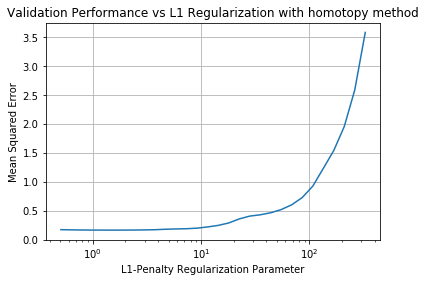

In [18]:
fig, ax = plt.subplots()
ax.semilogx(scores_["reg_val"], scores_["score"])
ax.grid()
ax.set_title("Validation Performance vs L1 Regularization with homotopy method")
ax.set_xlabel("L1-Penalty Regularization Parameter")
ax.set_ylabel("Mean Squared Error")
plt.show()